In [8]:
pip install pandas numpy scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load dataset
file_path = "C:/Users/Vedha Pranava/Desktop/ml_1/cyberbullying_tweets.csv"
data = pd.read_csv(file_path)

# Encode the class labels
label_encoder = LabelEncoder()
data['cyberbullying_type'] = label_encoder.fit_transform(data['cyberbullying_type'])

# Filter to include only two classes
filtered_data = data[data['cyberbullying_type'].isin([0, 1])]

# Convert tweet text to TF-IDF features
tfidf = TfidfVectorizer(max_features=300)
features = tfidf.fit_transform(filtered_data['tweet_text']).toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, filtered_data['cyberbullying_type'], test_size=0.3, random_state=42)

# Train kNN classifier (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Confusion matrix for training and testing sets
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Classification report (Precision, Recall, F1-Score)
train_classification_report = classification_report(y_train, y_train_pred)
test_classification_report = classification_report(y_test, y_test_pred)

print("Training Confusion Matrix:\n", train_confusion_matrix)
print("Testing Confusion Matrix:\n", test_confusion_matrix)
print("Training Classification Report:\n", train_classification_report)
print("Testing Classification Report:\n", test_classification_report)


Training Confusion Matrix:
 [[3745 1844]
 [  41 5537]]
Testing Confusion Matrix:
 [[1238 1165]
 [  26 2357]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.67      0.80      5589
           1       0.75      0.99      0.85      5578

    accuracy                           0.83     11167
   macro avg       0.87      0.83      0.83     11167
weighted avg       0.87      0.83      0.83     11167

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.52      0.68      2403
           1       0.67      0.99      0.80      2383

    accuracy                           0.75      4786
   macro avg       0.82      0.75      0.74      4786
weighted avg       0.82      0.75      0.74      4786



In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# A2. Calculate MSE, RMSE, MAPE, and R2 Scores
# Assume y_true and y_pred are your true and predicted values

# Example data (replace with your actual regression data)
y_true = np.array([100, 200, 300, 400, 500])
y_pred = np.array([110, 210, 310, 405, 490])

# Mean Squared Error
mse = mean_squared_error(y_true, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# Mean Absolute Percentage Error
mape = mean_absolute_percentage_error(y_true, y_pred)

# R2 Score
r2 = r2_score(y_true, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"R2 Score: {r2}")


MSE: 85.0
RMSE: 9.219544457292887
MAPE: 0.04316666666666667
R2 Score: 0.99575


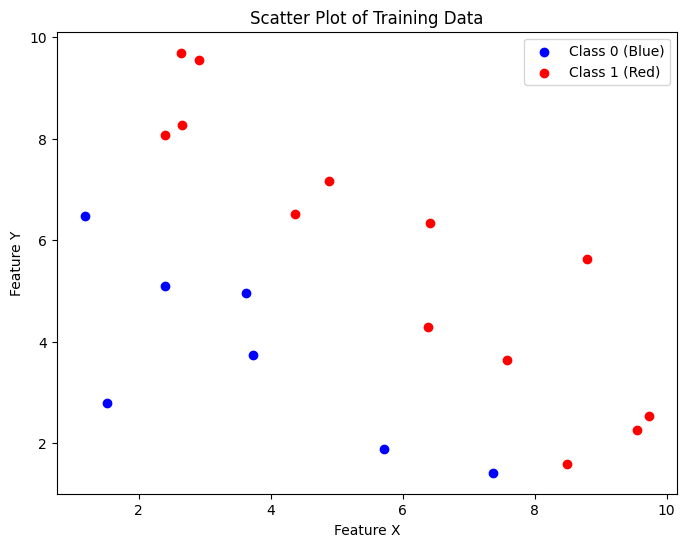

In [17]:
import matplotlib.pyplot as plt

# A3. Generate 20 random data points for two features (X & Y) and plot scatter plot
np.random.seed(42)

# Generate 20 random data points between 1 and 10 for X and Y
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)

# Assign classes based on some condition (arbitrarily assigning here)
classes = np.where(X + Y > 10, 1, 0)  # Class 0 (Blue) and Class 1 (Red)

# Scatter plot of the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0 (Blue)')
plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1 (Red)')
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("Scatter Plot of Training Data")
plt.legend()
plt.show()


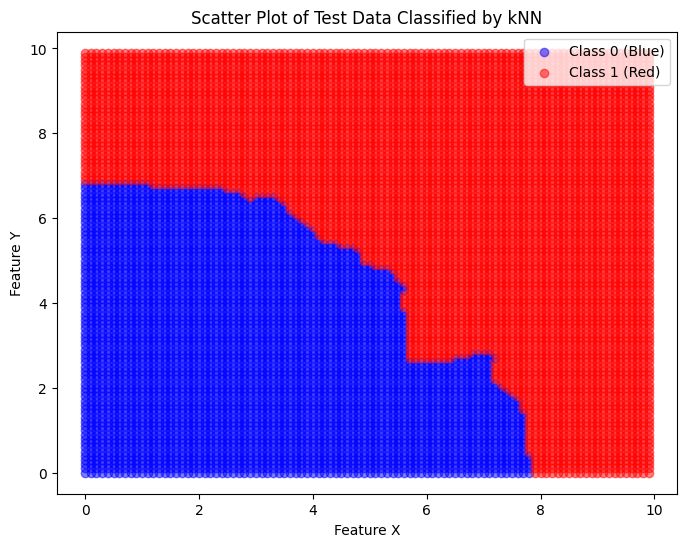

In [18]:
# A4. Generate test set data and classify using kNN
test_X, test_Y = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))
test_data = np.c_[test_X.ravel(), test_Y.ravel()]

# Train kNN classifier on the above generated data
train_data = np.c_[X, Y]
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, classes)

# Predict the class labels for test data
test_classes = knn.predict(test_data)

# Scatter plot of the test data
plt.figure(figsize=(8, 6))
plt.scatter(test_data[test_classes == 0][:, 0], test_data[test_classes == 0][:, 1], color='blue', label='Class 0 (Blue)', alpha=0.5)
plt.scatter(test_data[test_classes == 1][:, 0], test_data[test_classes == 1][:, 1], color='red', label='Class 1 (Red)', alpha=0.5)
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("Scatter Plot of Test Data Classified by kNN")
plt.legend()
plt.show()


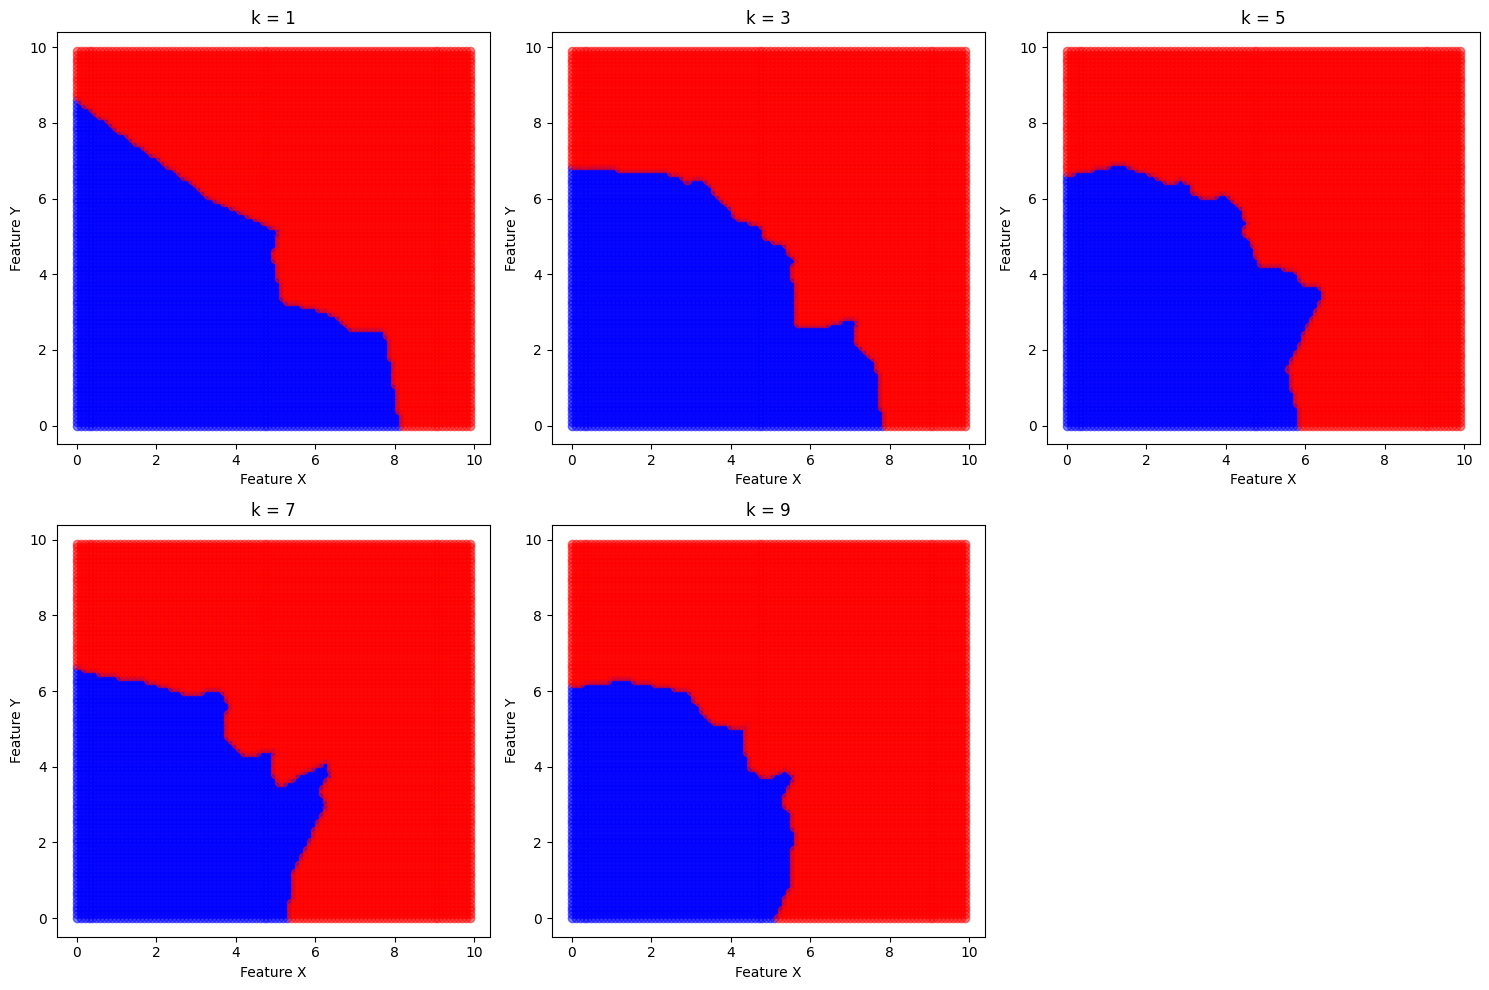

In [19]:
# A5. Repeat classification with different values of k and observe boundary changes
k_values = [1, 3, 5, 7, 9]

plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, classes)
    test_classes = knn.predict(test_data)

    plt.subplot(2, 3, i)
    plt.scatter(test_data[test_classes == 0][:, 0], test_data[test_classes == 0][:, 1], color='blue', alpha=0.5)
    plt.scatter(test_data[test_classes == 1][:, 0], test_data[test_classes == 1][:, 1], color='red', alpha=0.5)
    plt.title(f"k = {k}")
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")

plt.tight_layout()
plt.show()


In [26]:
from sklearn.model_selection import GridSearchCV

# A7. Use GridSearchCV for hyperparameter tuning (finding the best k)
param_grid = {'n_neighbors': np.arange(1, 20)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(train_data, classes)

# Best k value found
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value: {best_k}")


Best k value: 1


C:\Users\Vedha Pranava\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vedha Pranava\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Vedha Pranava\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Vedha Pranava\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                

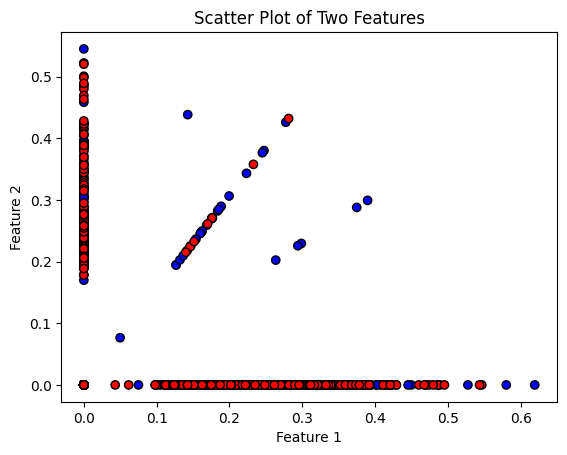

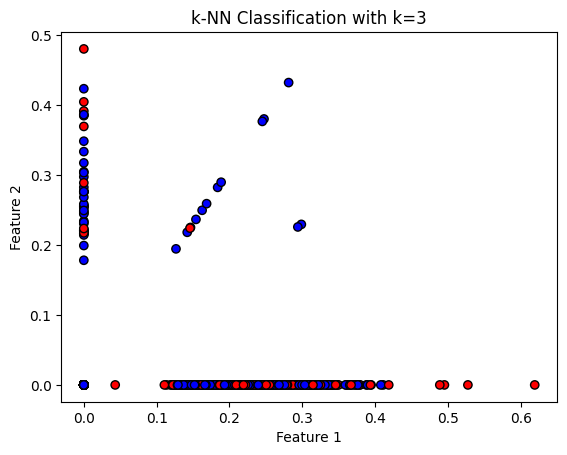

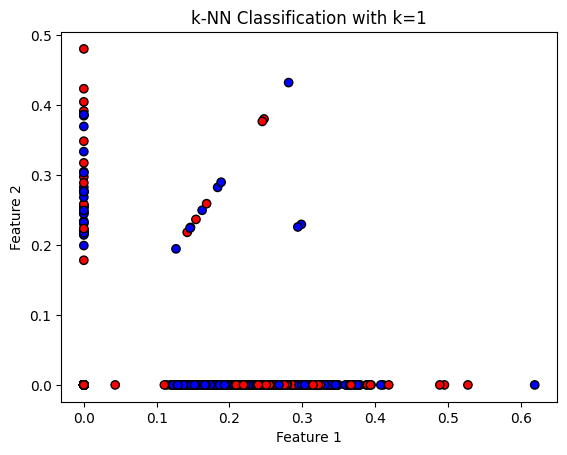

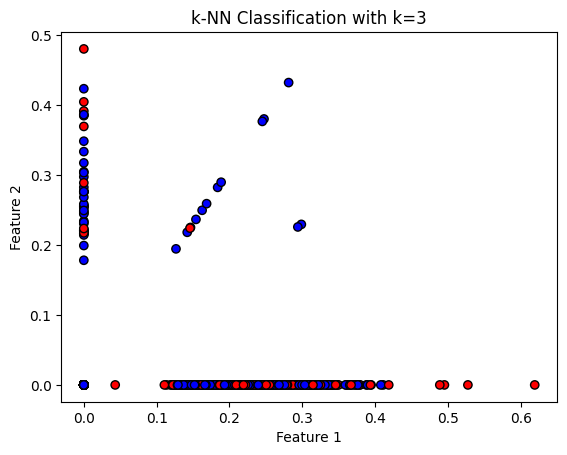

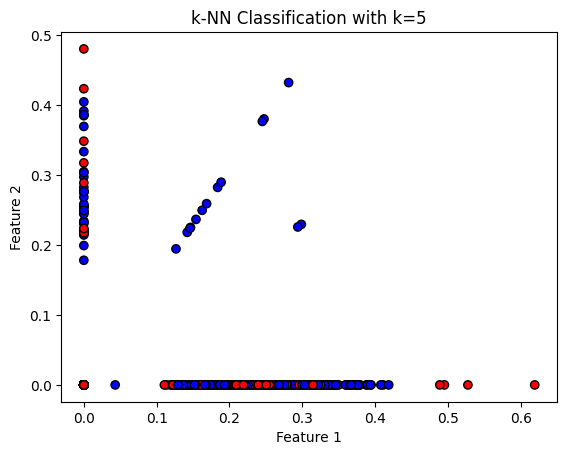

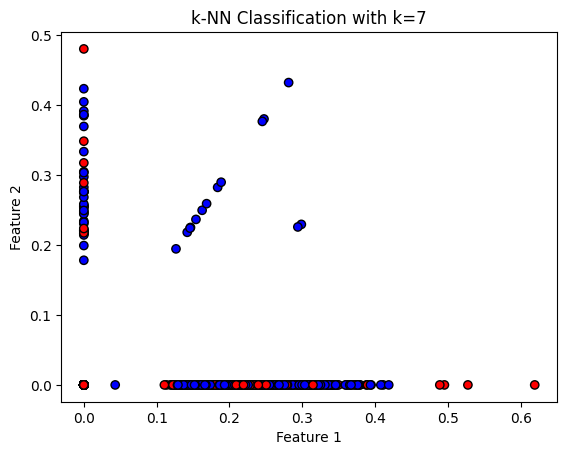

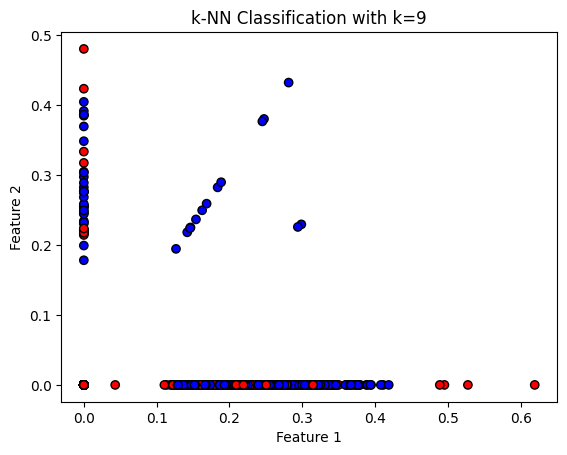

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset
file_path = "C:/Users/Vedha Pranava/Desktop/ml_1/cyberbullying_tweets.csv"
data = pd.read_csv(file_path)

# Encode the class labels
label_encoder = LabelEncoder()
data['cyberbullying_type'] = label_encoder.fit_transform(data['cyberbullying_type'])

# Filter to include only two classes
filtered_data = data[data['cyberbullying_type'].isin([0, 1])]

# A3: Select two features (for simplicity, we'll use the first two TF-IDF features)
tfidf = TfidfVectorizer(max_features=300)
features = tfidf.fit_transform(filtered_data['tweet_text']).toarray()
X = features[:, :2]  # Selecting the first two features
y = filtered_data['cyberbullying_type']

# Scatter plot for training data (A3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Two Features')
plt.show()

# A4: Generate test set data and classify using k-NN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train k-NN classifier (k=3)
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict test set and plot the results
y_pred = knn.predict(X_test)

# Scatter plot of the test data with predicted class labels (A4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'k-NN Classification with k={k}')
plt.show()

# A5: Repeat for various values of k
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Plot the test data with predicted class labels
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='bwr', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'k-NN Classification with k={k}')
    plt.show()
